# Tarea 3 - Miguel Rios Tangarife - Modelo B

Importamos las librerías que empleamos

In [1]:
import glob
import seaborn as sns
import pandas as pd
import matplotlib.image as img
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
import cv2
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix
import numpy as np
from  sklearn.linear_model import LogisticRegression
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import random

Definimos aspectos importantes como el tamaño que queremos utilizar para las imagenes

Definimos el batch size(entre más grande sea más demanda de cpu y memoria presenta)

Indicamos dónde están las imagenes de entrenamiento(ruta)

In [2]:
desire_size = (100,100)
batch_size = 350
train_ds = tf.keras.utils.image_dataset_from_directory(
  "data/train/",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=desire_size,
  batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
  "data/train/",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=desire_size,
  batch_size=batch_size)

class_names = train_ds.class_names

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 4253 files belonging to 11 classes.
Using 3403 files for training.
Found 4253 files belonging to 11 classes.
Using 850 files for validation.


Debemos validar que si estén las 11 carpetas de train

**Nota**: La carpeta Shepherd's Purse en un inicio no era leida correctamente, esto 
se debe a el apostrofe en **Shepherd's**, una vez retirado el apostrofe si se reconoce.

In [3]:
#Verificamos que estén las 11 clases
print(class_names)

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


## Verificar que se cargaron imágenes

Se mostrará una imagen aleatoria por cada una de las 11 clases

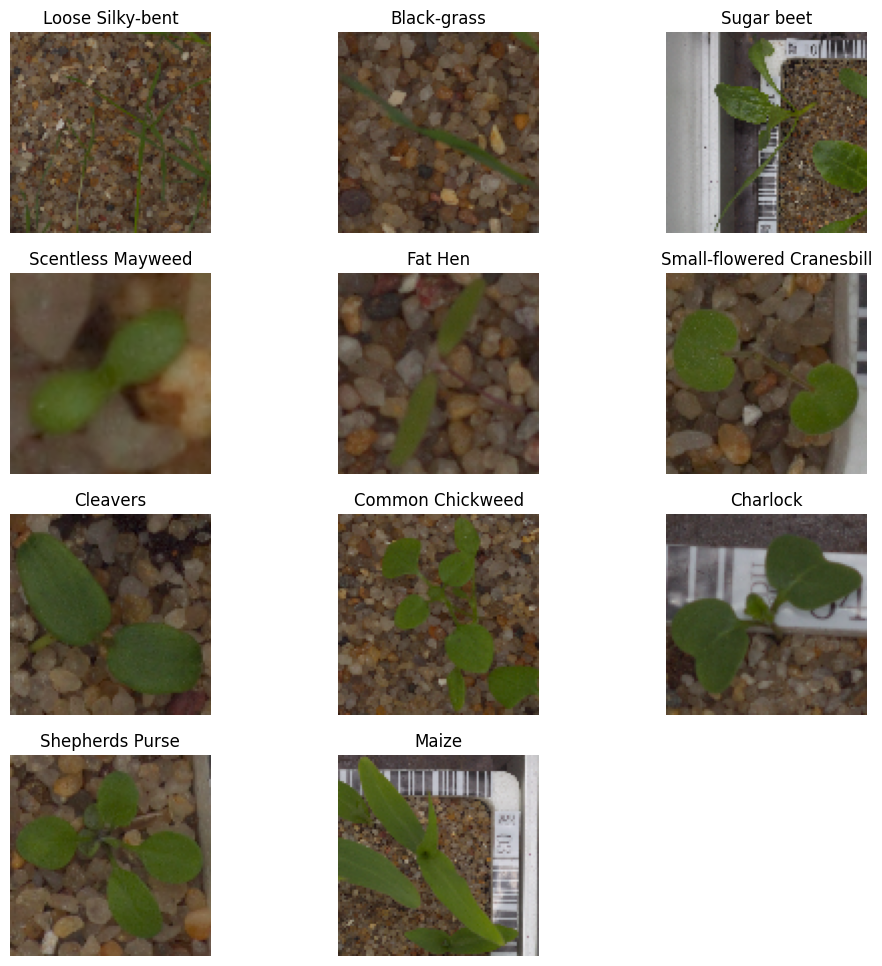

In [4]:
plt.figure(figsize=(12, 12))
selected_classes = set()
while len(selected_classes) < len(class_names):
    for images, labels in train_ds:
        index = random.randint(0, images.shape[0] - 1) 
        if labels[index].numpy() not in selected_classes:
            selected_classes.add(labels[index].numpy())  
            class_name = class_names[labels[index].numpy()]
            plt.subplot(4, 3, len(selected_classes))  
            plt.imshow(images[index].numpy().astype("uint8"))
            plt.title(class_name)
            plt.axis("off")
        if len(selected_classes) == len(class_names):
            break  
plt.show()

## Arquitectura (CNN) utilizando TensorFlow y Keras

En esta parte implementamos el modelo CNN con las todos los parámetros que consideramos convenientes para el caso de las plantas

In [5]:
model2 = Sequential([
  layers.Rescaling(1./255, input_shape=(desire_size[0], desire_size[1], 3)),
  layers.Conv2D(16, 2, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 2, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Conv2D(64, 2, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 2, padding='same', activation='relu'),
  layers.MaxPooling2D(),  
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.3), 
  layers.Dense(50, activation='relu'),
  layers.Dropout(0.3),   
  layers.Dense(11)
])
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Usaremos **model.summary()** para ver datos del modelo

In [6]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 25, 25, 32)        0

Realizamos los epochs, los cuales se encargan de ir entrenando y mostrando los valores de precisión que va adquiriendo el modelo

En este punto según los parámetros del modelo ajustados previamente, se exigirá mucho o poco al hardware del equipo

**En total fueron 38 epochs**

In [7]:
epochs=5
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
10/10 [==============================] - 13s 1s/step - loss: 2.3563 - accuracy: 0.1525 - val_loss: 2.3204 - val_accuracy: 0.2271
Epoch 2/5
10/10 [==============================] - 11s 1s/step - loss: 2.2424 - accuracy: 0.2468 - val_loss: 2.0855 - val_accuracy: 0.3235
Epoch 3/5
10/10 [==============================] - 10s 1s/step - loss: 2.0296 - accuracy: 0.3153 - val_loss: 1.8181 - val_accuracy: 0.3965
Epoch 4/5
10/10 [==============================] - 11s 1s/step - loss: 1.8371 - accuracy: 0.3582 - val_loss: 1.6263 - val_accuracy: 0.4118
Epoch 5/5
10/10 [==============================] - 11s 1s/step - loss: 1.7154 - accuracy: 0.3935 - val_loss: 1.5128 - val_accuracy: 0.4459


In [8]:
epochs=10
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
10/10 [==============================] - 11s 1s/step - loss: 1.6042 - accuracy: 0.4246 - val_loss: 1.4294 - val_accuracy: 0.4765
Epoch 2/10
10/10 [==============================] - 11s 1s/step - loss: 1.5368 - accuracy: 0.4540 - val_loss: 1.3551 - val_accuracy: 0.5329
Epoch 3/10
10/10 [==============================] - 11s 1s/step - loss: 1.4645 - accuracy: 0.4802 - val_loss: 1.2740 - val_accuracy: 0.5588
Epoch 4/10
10/10 [==============================] - 11s 1s/step - loss: 1.3658 - accuracy: 0.5248 - val_loss: 1.2390 - val_accuracy: 0.6224
Epoch 5/10
10/10 [==============================] - 11s 1s/step - loss: 1.2970 - accuracy: 0.5598 - val_loss: 1.1192 - val_accuracy: 0.6435
Epoch 6/10
10/10 [==============================] - 11s 1s/step - loss: 1.2139 - accuracy: 0.5839 - val_loss: 1.0392 - val_accuracy: 0.6682
Epoch 7/10
10/10 [==============================] - 11s 1s/step - loss: 1.1517 - accuracy: 0.6083 - val_loss: 1.0019 - val_accuracy: 0.6718
Epoch 8/10
10/10 [==

In [9]:
epochs=10
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
10/10 [==============================] - 10s 1s/step - loss: 0.9242 - accuracy: 0.6826 - val_loss: 0.7987 - val_accuracy: 0.7412
Epoch 2/10
10/10 [==============================] - 11s 1s/step - loss: 0.8580 - accuracy: 0.7064 - val_loss: 0.7424 - val_accuracy: 0.7647
Epoch 3/10
10/10 [==============================] - 11s 1s/step - loss: 0.8273 - accuracy: 0.7244 - val_loss: 0.6953 - val_accuracy: 0.7824
Epoch 4/10
10/10 [==============================] - 11s 1s/step - loss: 0.7874 - accuracy: 0.7288 - val_loss: 0.6977 - val_accuracy: 0.7647
Epoch 5/10
10/10 [==============================] - 11s 1s/step - loss: 0.7840 - accuracy: 0.7308 - val_loss: 0.6667 - val_accuracy: 0.7753
Epoch 6/10
10/10 [==============================] - 11s 1s/step - loss: 0.7194 - accuracy: 0.7540 - val_loss: 0.6299 - val_accuracy: 0.7906
Epoch 7/10
10/10 [==============================] - 11s 1s/step - loss: 0.6976 - accuracy: 0.7570 - val_loss: 0.6149 - val_accuracy: 0.8071
Epoch 8/10
10/10 [==

In [10]:
epochs=5
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
10/10 [==============================] - 11s 1s/step - loss: 0.6202 - accuracy: 0.8002 - val_loss: 0.6323 - val_accuracy: 0.8094
Epoch 2/5
10/10 [==============================] - 10s 1s/step - loss: 0.5877 - accuracy: 0.7964 - val_loss: 0.5701 - val_accuracy: 0.8212
Epoch 3/5
10/10 [==============================] - 10s 1s/step - loss: 0.5349 - accuracy: 0.8178 - val_loss: 0.5766 - val_accuracy: 0.8188
Epoch 4/5
10/10 [==============================] - 10s 1s/step - loss: 0.5487 - accuracy: 0.8058 - val_loss: 0.5545 - val_accuracy: 0.8247
Epoch 5/5
10/10 [==============================] - 10s 1s/step - loss: 0.5178 - accuracy: 0.8202 - val_loss: 0.5676 - val_accuracy: 0.8165


In [11]:
epochs=5
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
10/10 [==============================] - 11s 1s/step - loss: 0.5039 - accuracy: 0.8319 - val_loss: 0.5546 - val_accuracy: 0.8306
Epoch 2/5
10/10 [==============================] - 11s 1s/step - loss: 0.4794 - accuracy: 0.8290 - val_loss: 0.5449 - val_accuracy: 0.8318
Epoch 3/5
10/10 [==============================] - 13s 1s/step - loss: 0.4638 - accuracy: 0.8454 - val_loss: 0.5597 - val_accuracy: 0.8106
Epoch 4/5
10/10 [==============================] - 12s 1s/step - loss: 0.4411 - accuracy: 0.8410 - val_loss: 0.5520 - val_accuracy: 0.8376
Epoch 5/5
10/10 [==============================] - 12s 1s/step - loss: 0.4061 - accuracy: 0.8598 - val_loss: 0.5455 - val_accuracy: 0.8259


In [12]:
epochs=3
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/3
10/10 [==============================] - 11s 1s/step - loss: 0.4315 - accuracy: 0.8490 - val_loss: 0.5194 - val_accuracy: 0.8424
Epoch 2/3
10/10 [==============================] - 11s 1s/step - loss: 0.3988 - accuracy: 0.8619 - val_loss: 0.5196 - val_accuracy: 0.8329
Epoch 3/3
10/10 [==============================] - 11s 1s/step - loss: 0.3933 - accuracy: 0.8592 - val_loss: 0.5458 - val_accuracy: 0.8294


### Archivo para submit

Aqui nos preparamos para el entrenamiento del modelo y posterior guardado.

In [13]:
x_obb_c =[]
file_ob=[]
for file in glob.glob("data\\test\\*"):
    im = Image.open(file)
    imf_resis= im.resize(desire_size)
    x_obb_c.append(np.array(imf_resis))
    file_ob.append(file.split("\\")[2])

In [14]:
y_hat = []
img_array = None
for f in file_ob:
    img= tf.keras.utils.load_img(
        f"data/test/{f}", target_size=desire_size
    )
    img_array= tf.keras.utils.img_to_array(img)
    img_array= tf.expand_dims(img_array, 0)
    predicciones = model2.predict(img_array)
    score = tf.nn.softmax(predicciones[0])
    y_hat.append(score.numpy())

1/1 [==============================] - 0s 17ms/step


In [15]:
df_oob = pd.DataFrame(data= zip(file_ob,[class_names[l] for l in np.argmax(y_hat,axis=1)]),
                        columns=["file","species"])
df_oob.to_csv("data/prediction_modelBtry14.csv", index=False)

#verificamos que guarde bien
try:
    df_oob.to_csv("data/prediction_modelBtry14.csv", index=False)
    print("El archivo prediction se ha guardado correctamente en la ruta especificada.")
except Exception as e:
    print("Se produjo un error al intentar guardar el archivo CSV:", str(e))

El archivo prediction se ha guardado correctamente en la ruta especificada.
